# 2. Introducció a NLTK: tokenització i n-grames

Tractament de Dades Textuals i Codificades — Eixample Clínic, 2026

Pol Pastells, ppastells@eixampleclinic.es

---

En aquesta sessió començarem a treballar amb la llibreria NLTK. Carregarem un corpus i el processarem. 

Aplicarem transformacions bàsiques com la segmentació de frases i tokenització.

Podeu mirar-vos la documentació: [NLTK](https://www.nltk.org/index.html) i [The NLTK Book](https://www.nltk.org/book/)

In [1]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import nltk

In [3]:
# Descarregar els paquets de funcions importants per aquesta sessió
# Segons l'ordinador, és possible que us en demani algun més
nltk.download("reuters")
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package reuters to /home/pol/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/pol/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Corpus Reuters

In [4]:
from nltk import FreqDist, sent_tokenize
from nltk.corpus import reuters
from nltk.tokenize import word_tokenize

# Informació sobre aquest corpus
print(reuters.readme())


      The Reuters-21578 benchmark corpus, ApteMod version

This is a publically available version of the well-known Reuters-21578
"ApteMod" corpus for text categorization.  It has been used in
publications like these:

 * Yiming Yang and X. Liu. "A re-examination of text categorization
   methods".  1999.  Proceedings of 22nd Annual International SIGIR.
   http://citeseer.nj.nec.com/yang99reexamination.html

 * Thorsten Joachims. "Text categorization with support vector
   machines: learning with many relevant features".  1998. Proceedings
   of ECML-98, 10th European Conference on Machine Learning.
   http://citeseer.nj.nec.com/joachims98text.html

ApteMod is a collection of 10,788 documents from the Reuters financial
newswire service, partitioned into a training set with 7769 documents
and a test set with 3019 documents.  The total size of the corpus is
about 43 MB.  It is also available for download from
http://kdd.ics.uci.edu/databases/reuters21578/reuters21578.html ,
which includ

In [7]:
# Obtenir tots els identificadors dels arxius del corpus reuters
files = reuters.fileids()
len(files), files[23]

(10788, 'test/14873')

In [8]:
# categories de textos
reuters.categories()[:10]

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee']

In [11]:
# textos amb una categoria donada
reuters.fileids("trade")[:10]

['test/14826',
 'test/14832',
 'test/14858',
 'test/14862',
 'test/14881',
 'test/14904',
 'test/14912',
 'test/15154',
 'test/15171',
 'test/15223']

In [12]:
# Comencem treballant amb un únic arxiu
c_fid = "test/14826"

# Podem extreure la versió sense processar d'aquest arxiu (raw)
test_raw = reuters.raw(c_fid)

print(test_raw)

ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears among many of Asia's exporting
  nations that the row could inflict far-reaching economic
  damage, businessmen and officials said.
      They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to curbs on American imports of their products.
      But some exporters said that while the conflict would hurt
  them in the long-run, in the short-term Tokyo's loss might be
  their gain.
      The U.S. Has said it will impose 300 mln dlrs of tariffs on
  imports of Japanese electronics goods on April 17, in
  retaliation for Japan's alleged failure to stick to a pact not
  to sell semiconductors on world markets at below cost.
      Unofficial Japanese estimates put the impact of the tariffs
  at 10 billion dlrs and spokesmen for major electronics firms
  said they would virtually halt exports

Podem disposar d'una versió tokenitzada per paraules de l'arxiu o el corpus

In [19]:
text_words = reuters.words(c_fid)

print(text_words[:80])

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.', 'They', 'told', 'Reuter', 'correspondents', 'in', 'Asian', 'capitals', 'a', 'U', '.', 'S', '.', 'Move', 'against', 'Japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'U', '.', 'S', '.', 'And', 'lead', 'to', 'curbs', 'on', 'American']


També podem extreure una versió tokenitzada i segmentat per frases

In [20]:
text_sent = reuters.sents(c_fid)

print(text_sent[:10])

[['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.'], ['They', 'told', 'Reuter', 'correspondents', 'in', 'Asian', 'capitals', 'a', 'U', '.', 'S', '.', 'Move', 'against', 'Japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'U', '.', 'S', '.', 'And', 'lead', 'to', 'curbs', 'on', 'American', 'imports', 'of', 'their', 'products', '.'], ['But', 'some', 'exporters', 'said', 'that', 'while', 'the', 'conflict', 'would', 'hurt', 'them', 'in', 'the', 'long', '-', 'run', ',', 'in', 'the', 'short', '-', 'term', 'Tokyo', "'", 's', 'loss', 'might', 'be', 'their', 'gain', '.'], ['The', 'U', '.', 'S', '.', 'Has', 'said', 'it', 'will', '

El corpus `reuters` ja està processat, per tant podem fer `.words()` i `.sents()`, però NLTK té una sèrie d'eines que ens permeten obtenir la tokenització d'un corpus qualsevol

In [22]:
manual_tok = word_tokenize(test_raw)

# Fixeu-vos en la sortida. Compareu el resultat amb l'obtingut amb la versió "pre-tokenitzada".
print(manual_tok[:39])

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U.S.-JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U.S.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'s", 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far-reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.']


In [23]:
# Provem utilitzant la funció 'split()' per separar les paraules
split_pre_tok = test_raw.split()

# Compareu el resultat amb els anteriors. Què passa amb els signes de puntuació?
print(split_pre_tok[0:36])

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U.S.-JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U.S.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', "Asia's", 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far-reaching', 'economic', 'damage,', 'businessmen', 'and', 'officials', 'said.']


In [28]:
# Amb NLTK també podem tokenitzar a nivell de frase, és a dir les frases són els nostres tokens:
manual_sent = sent_tokenize(test_raw)

# Observa les dues primeres frases
print(manual_sent[0:2])

["ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT\n  Mounting trade friction between the\n  U.S. And Japan has raised fears among many of Asia's exporting\n  nations that the row could inflict far-reaching economic\n  damage, businessmen and officials said.", 'They told Reuter correspondents in Asian capitals a U.S.\n  Move against Japan might boost protectionist sentiment in the\n  U.S. And lead to curbs on American imports of their products.']


[('.', 62), ('the', 32), ('of', 30), ('to', 26), (',', 20), ('U', 19), ('S', 19), ('said', 16), ('a', 14), ('trade', 13)]


<Axes: xlabel='Samples', ylabel='Counts'>

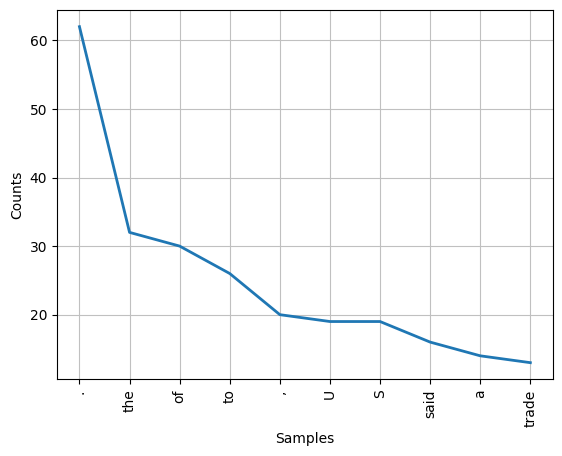

In [29]:
# Amb la següent funció de NLTK contem la freqüència de paraules d'un corpus
# és una funció basada en collections.Counter
fd = FreqDist(text_words)
print(fd.most_common(10))
fd.plot(10)

## N-grames

Si ens interessa veure paraules que apareixen juntes, NLTK té un seguit de funcions per extreure n-grames: `bigrams`, `trigrams`, `ngrams`

In [30]:
from nltk import bigrams, ngrams, trigrams

In [37]:
text_words[:20]

['ASIAN',
 'EXPORTERS',
 'FEAR',
 'DAMAGE',
 'FROM',
 'U',
 '.',
 'S',
 '.-',
 'JAPAN',
 'RIFT',
 'Mounting',
 'trade',
 'friction',
 'between',
 'the',
 'U',
 '.',
 'S',
 '.']

In [32]:
text_bi = list(bigrams(text_words))
print(text_bi[:5])

[('ASIAN', 'EXPORTERS'), ('EXPORTERS', 'FEAR'), ('FEAR', 'DAMAGE'), ('DAMAGE', 'FROM'), ('FROM', 'U')]


In [33]:
text_tri = list(trigrams(text_words))
print(text_tri[:5])

[('ASIAN', 'EXPORTERS', 'FEAR'), ('EXPORTERS', 'FEAR', 'DAMAGE'), ('FEAR', 'DAMAGE', 'FROM'), ('DAMAGE', 'FROM', 'U'), ('FROM', 'U', '.')]


In [36]:
text_4gram = list(ngrams(text_words, 6))
print(text_4gram[:5])

[('ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U'), ('EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.'), ('FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S'), ('DAMAGE', 'FROM', 'U', '.', 'S', '.-'), ('FROM', 'U', '.', 'S', '.-', 'JAPAN')]


### Extra: `zip` i `enumerate`

Podem fer bigrames fàcilment amb `zip` també, però per N més gran les funcions de NLTK són més senzilles.

`zip` retorna un iterador. El podem fer servir amb un bucle for o bé passar-ho a llista

In [ ]:
for a, b in zip(["a", "b", "c"], ["do", "re", "mi"]):
    print(a, b)

In [ ]:
# enumerate és bàsicament el mateix que un zip on el primer element és un range
llista = ["do", "re", "mi"]

for a, b in zip(range(len(llista)), llista):
    print(a, b)

print()

for i, v in enumerate(llista):
    print(i, v)

In [ ]:
# Si els 2 elements tenen llargada diferent s'agafa la llargada mínima
for a, b in zip(llista, llista[1:]):
    print(a, b)

In [ ]:
# Fent que el segon element sigui la mateixa llista però començant a l'índex 1 tenim bigrames
bigrames_zip = list(zip(text_words, text_words[1:]))
bigrames_zip[:5]

## Stop words

NLTK té una llista genèrica de `stop words` (paraules gramaticals + paraules freqüents) més comuns per diverses llengües.
Sovint ens interessarà afegir-n'hi alguna, però és un bon punt de partida.

In [40]:
from nltk.corpus import stopwords

# Observem la llista de llengües amb 'stop words' disponibles
languages_sw = stopwords.fileids()
print(languages_sw)
print("\n")

# observeu les 'stop words' d'altres llengües
cat_stop_words = stopwords.words("catalan")
print(cat_stop_words, "\n")

# per treure les stop words d'un text podem fer servir list comprehensions
en_stop_words = stopwords.words("english")
print(en_stop_words)
print([token for token in text_words if token not in en_stop_words])

['albanian', 'arabic', 'azerbaijani', 'basque', 'belarusian', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'tamil', 'turkish', 'uzbek']


['a', 'abans', 'ací', 'ah', 'així', 'això', 'al', 'aleshores', 'algun', 'alguna', 'algunes', 'alguns', 'alhora', 'allà', 'allí', 'allò', 'als', 'altra', 'altre', 'altres', 'amb', 'ambdues', 'ambdós', 'anar', 'ans', 'apa', 'aquell', 'aquella', 'aquelles', 'aquells', 'aquest', 'aquesta', 'aquestes', 'aquests', 'aquí', 'baix', 'bastant', 'bé', 'cada', 'cadascuna', 'cadascunes', 'cadascuns', 'cadascú', 'com', 'consegueixo', 'conseguim', 'conseguir', 'consigueix', 'consigueixen', 'consigueixes', 'contra', "d'un", "d'una", "d'unes", "d'uns", 'dalt', 'de', 'del', 'dels', 'des', 'des de', 'després', 'dins', 'dintre', 'donat', 'doncs

## Tokenització especialitzada

NLTK compta amb tokenitzadors especialitzats com regexp_tokenize, MWETokenizer o TweetTokenizer, destinat a text amb format 'Twitter'.

regex = regular expression

Comencem amb `regexp_tokenize`, que utilitza expressions regulars.
Especifiquem l'expressió regular que volem per tokenitzar la cadena de caràcters. La primera part de l'expressió (`\w+`) busca un o més caràcters alfanumèrics. Separarà quan aparegui un signe de puntuació o espai en blanc.
La segona part de l'expressió (`\$[\d.]+`) captura una part de l'string que comenci per '$' seguit d'un o més dígits o punt. I l'última part de l'expressió (`\S+`) captura qualsevol caràcter que no sigui un espai en blanc, així pot capturar els signes de puntuació.

Les expressions regulars són complexes, però sempre que en necessiteu una podeu buscar com es fa i provar-la fins que us funcioni, no us hi capfiqueu.

In [42]:
from nltk.tokenize import MWETokenizer, TweetTokenizer, regexp_tokenize

In [43]:
s = "Good muffins cost $3.88\nin New York. Please buy me\ntwo of them.\n\nThanks."
s_regexp_1 = regexp_tokenize(s, pattern=r"\w+|\$[\d.]+|\S+")
print(s_regexp_1)

['Good', 'muffins', 'cost', '$3.88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.']


In [47]:
s = "Tinc 2,34 grams de blat, 3 monedes i 8.352,23€, $23.23"
s_regexp_1 = regexp_tokenize(s, pattern=r"\b\d{1,3}(?:\.\d{3})*(?:,\d+)?\b")
print(s_regexp_1)

['2,34', '3', '8.352,23', '23', '23']


In [48]:
word_tokenize(s)

['Tinc',
 '2,34',
 'grams',
 'de',
 'blat',
 ',',
 '3',
 'monedes',
 'i',
 '8.352,23€',
 ',',
 '$',
 '23.23']

Amb Multi-Word Expressions Tokenizer (MWETokenizer) podem especificar combinacions de paraules perquè l'algorisme les tracti com un sol token.
Aquest objecte (és una classe) es fa servir amb 2 passos. 1) S'initcialitza amb les combinacions que ens interesse, 2) s'utilitza en una frase.

In [50]:
# 1) Inicialitzem
s = "Good muffins cost $3.88\nin New York. Please buy me\ntwo of them.\n\nThanks."
mwe_list = [("New", "York"), ("$", "3.88")]
mwe_tokenizer = MWETokenizer(mwe_list, separator=" ")

# 2) Tokenitzem una frase amb el MWETokenizer
tokens = word_tokenize(s)
tokens = mwe_tokenizer.tokenize(tokens)

print(tokens)

['Good', 'muffins', 'cost', '$ 3.88', 'in', 'New York', '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.']


Per tokenitzar piulades és típic treure els hashtags o noms d'usuari

In [51]:
tweet_tknz = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)

sentence = "@jrmy: I'm REALLY HAPPYYY  @hnry about that! NICEEEE :D :P"

print(tweet_tknz.tokenize(sentence))

[':', "i'm", 'really', 'happyyy', 'about', 'that', '!', 'niceee', ':D', ':P']


## Exercicis

In [54]:
# reuters.raw()

### Tasca 1

Tokenitzeu el corpus reuters utilitzant `split()` i després utilitzant `word_tokenize()`, per separat. Quines diferències hi veieu?

Compareu-ho també amb la versió `word()` del corpus.

Primer treballeu el codi per a un únic arxiu del corpus (per exemple, 'test/14826').
Després, executeu el codi per a tot el corpus `reuters.raw()` (sense especificar l'id de l'arxiu), pot tardar una mica.

Compareu els resultats. Quants tokens té cada corpus? Quants tokens únics hi ha a cada corpus?

|               | # tokens test/14826 | tokens únics test/14826 | # tokens tot reuters | tokens únics tot reuters |
|:-------------:|:-------------------:|:-----------------------:|----------------------|--------------------------|
| split         |                     |                         |                      |                          |
| word_tokenize |                     |                         |                      |                          |
| word          |                     |                         |                      |                          |

Feu servir la funció `lower()` pels strings, així normalitzeu tot el text a minúscules.

In [56]:
llista = [1, 2, 1, 1, 1, 2, 3]
list(set(llista))

[1, 2, 3]

### Tasca 2

Amb el corpus creat amb word_tokenize, calcula les paraules més freqüents

- Compteu-les manualment (amb un diccionari)
- Utilitzant el mètode FreqDist

Compareu les paraules més freqüents - surten els mateixos valors?

Per la comptabilització manual, podeu fer servir les funcions definides a continuació:

In [89]:
tokens = word_tokenize(reuters.raw(c_fid))

d = {}
for token in tokens:
    if token in d:
        d[token] += 1
    else:
        d[token] = 1

[k for k, v in d.items() if v > 10]

['trade',
 'the',
 'U.S.',
 'Japan',
 'of',
 "'s",
 ',',
 'and',
 'said',
 '.',
 'in',
 'a',
 'to']

<Axes: xlabel='Samples', ylabel='Counts'>

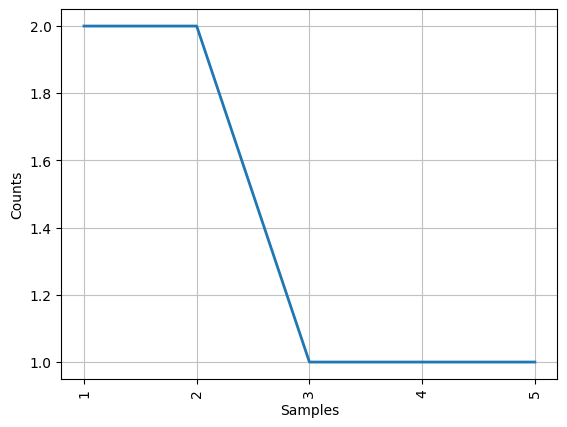

In [90]:
FreqDist([1, 1, 2, 2, 3, 4, 5]).plot(20)

# Llei de Zipf

In [85]:
import collections

import matplotlib.pyplot as plt


def mostCommonWords(d):
    c = collections.Counter(d)
    most = c.most_common(10)
    print("Rank\t\tParaula\t\tFreqüència")
    print("----\t\t----\t\t---------")
    for i, (w, f) in enumerate(most):
        print(str(i + 1) + "\t\t" + w + "\t\t" + str(f))


def plot(d):
    c = collections.Counter(d)
    most = c.most_common(10)
    plt.plot([x[1] for x in most])
    plt.grid()
    plt.xlabel("Rank de la paraula")
    plt.ylabel("Freqüència")

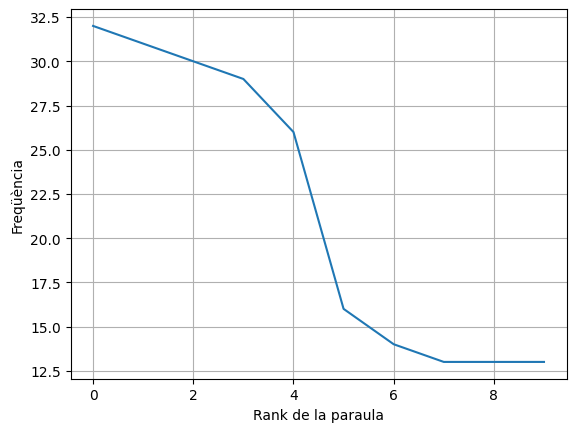

In [86]:
plot(d)

### Tasca 3

Utilitzant els corpus creats amb `word_tokenize` i la versió tokenitzada per paraules `.words()`, heu d'obtenir una llista de bigrames per cada corpus. Podeu treballeu primer amb un arxiu i després ampliar l'exercici per tot 'reuters'.

Calculeu i compareu la gràfica de freqüències ordenades dels bigrames pels dos corpus.

In [99]:
tots_tokens = word_tokenize(reuters.raw())

In [103]:
tots_words = reuters.words()

In [ ]:
bigrames = list(bigrams(tots_tokens[:200_000]))
print(type(bigrames), type(bigrames[0]))
bigrames

In [108]:
f1 = FreqDist(list(bigrams(tots_tokens[:200_000])))
f2 = FreqDist(list(bigrams(tots_words)))

<Axes: xlabel='Samples', ylabel='Counts'>

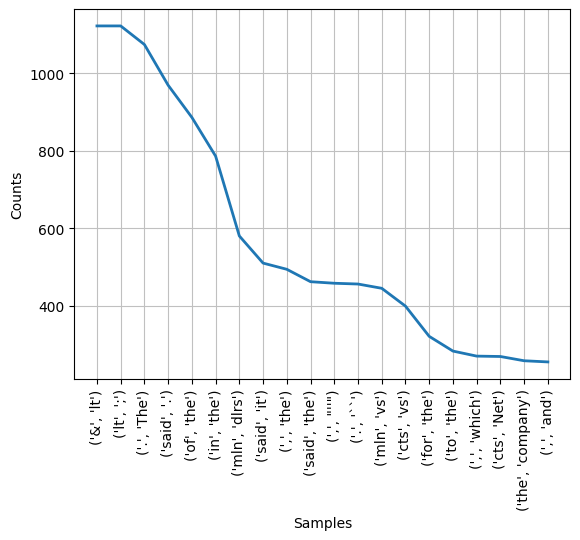

In [110]:
f1.plot(20)

<Axes: xlabel='Samples', ylabel='Counts'>

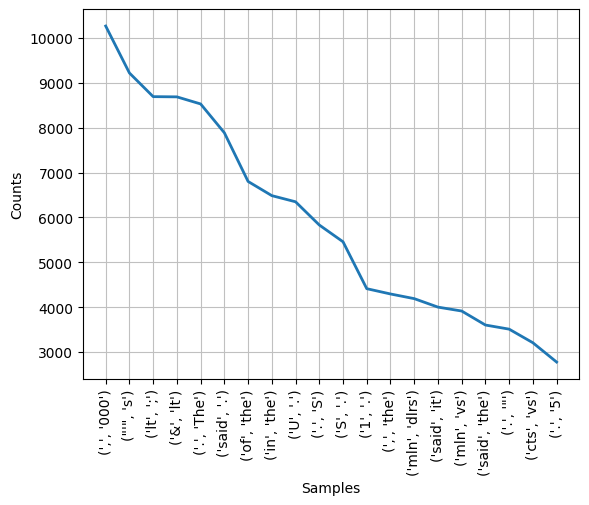

In [111]:
f2.plot(20)

### Tasca 4

Del resultat de la tasca 3, prescindiu dels bigrames que continguin alguna 'stop word' anglesa.
Fixeu-vos que el format dels bigrames és una tupla. Teniu maneres de comprovar si un string es troba dins d'una tupla, ja que aquesta és iterable tal com les llistes.

In [137]:
stops = en_stop_words + ["&", "lt", "S", ".", ",", '"', "mln", "dlrs", "cts"]

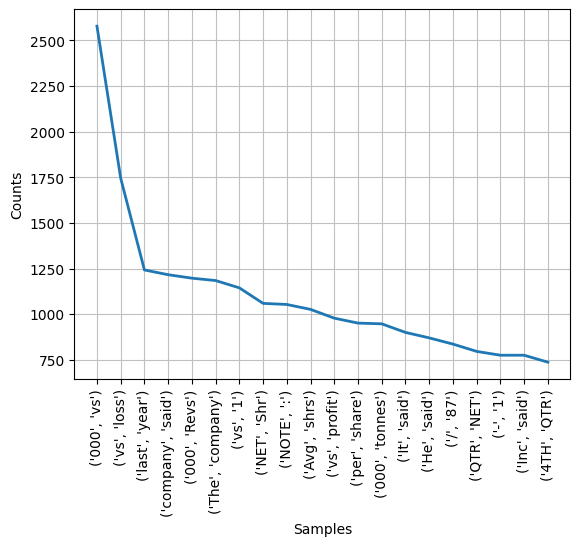

In [139]:
bigrames_tots = bigrams(tots_words)
bigrames_tots_nets = [bi for bi in bigrames_tots if (bi[0] not in stops) and (bi[1] not in stops)]
f2 = FreqDist(bigrames_tots_nets).plot(20)

<Axes: xlabel='Samples', ylabel='Counts'>

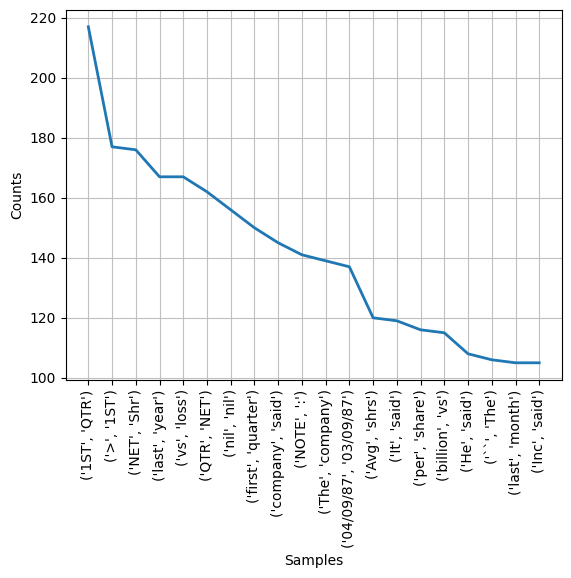

In [138]:
bigrames_nets = [bi for bi in bigrames if (bi[0] not in stops) and (bi[1] not in stops)]
FreqDist(bigrames_nets).plot(20)

## Tasques avançades

### Tasca 5

Calculeu la freqüència de les paraules del corpus, però aquest cop ignorant múltiples repeticions de la paraula en una frase. E.g: `["Casa meva és casa teva", "La cadira és estable"]`

En aquest exemple:
- La freqüència de "casa" és 1 (1 a la frase 1, 0 a la frase 2)
- La freqüència de "és" és 2 (1 a la frase 1, 1 a la frase 2)

Ignorarem les repeticions de cada paraula dins d'una mateixa frase.

Podeu fer servir el corpus existent separat per frases i paraules, o bé utilitzar `sent_tokenize` i `word_tokenize`.

### Tasca 6

Semblant a la tasca 3, calculeu la freqüència dels bigrames ignorant múltiples repeticions dins d'una mateixa frase.